# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.239621e+01     1.590448e+01
 * time: 0.003998994827270508
     1     5.880869e+01     1.134598e+01
 * time: 0.011707067489624023
     2     5.321911e+01     1.338536e+01
 * time: 0.12517809867858887
     3     3.745048e+01     1.104426e+01
 * time: 0.15258312225341797
     4     2.832485e+01     1.062118e+01
 * time: 0.17812395095825195
     5     2.549379e+01     9.164648e+00
 * time: 0.20215296745300293
     6     1.107590e+01     3.887923e+00
 * time: 0.22444605827331543
     7     7.693638e+00     1.319051e+00
 * time: 0.24349403381347656
     8     6.703207e+00     1.653439e+00
 * time: 0.322706937789917
     9     6.676727e+00     3.027725e+00
 * time: 0.3379509449005127
    10     6.300866e+00     2.697345e+00
 * time: 0.35291194915771484
    11     6.027208e+00     1.575942e+00
 * time: 0.36815690994262695
    12     5.754822e+00     1.268186e+00
 * time: 0.38293004035949707
    13     5.568424e+00     1.125268e+00
 * time: 

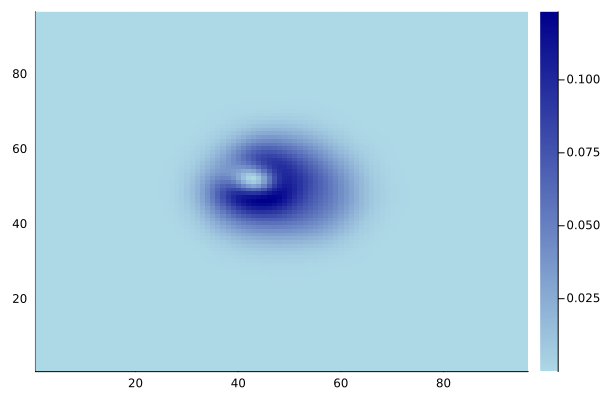

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)